<a href="https://colab.research.google.com/github/Sharddha-Sharddha/IITMLAssignments/blob/main/CNN_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Building a Neural Network on the MNIST dataset**

# About Dataset
The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. .

we will be building our own Neural Network! We will be training it on the MNIST handwritten digit dataset. The goal is to build a NN that will be able to take in an image as input and output which digit it thinks it is (0-9).

Here is a picture of what the MNIST dataset looks like: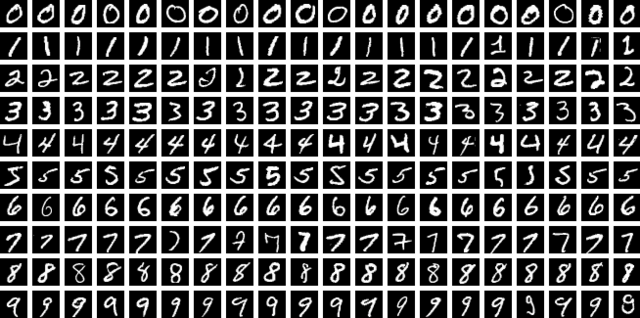

**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight #this tool is the "Equalizer" for biased datasets.

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

from PIL import Image, ImageOps

#PIL (Python Imaging Library, now known as Pillow) are your "Image Surgeons."
#While TensorFlow handles the math, Pillow handles the actual picture files.

# Image : class used to open, manipulate, and save images.
# ImageOps : This is a collection of "ready-made" image operations.
          #  In MNIST projects, its most important job is Inverting Colors
          #  ImageOps.invert() flips the colors so the model understands the image.



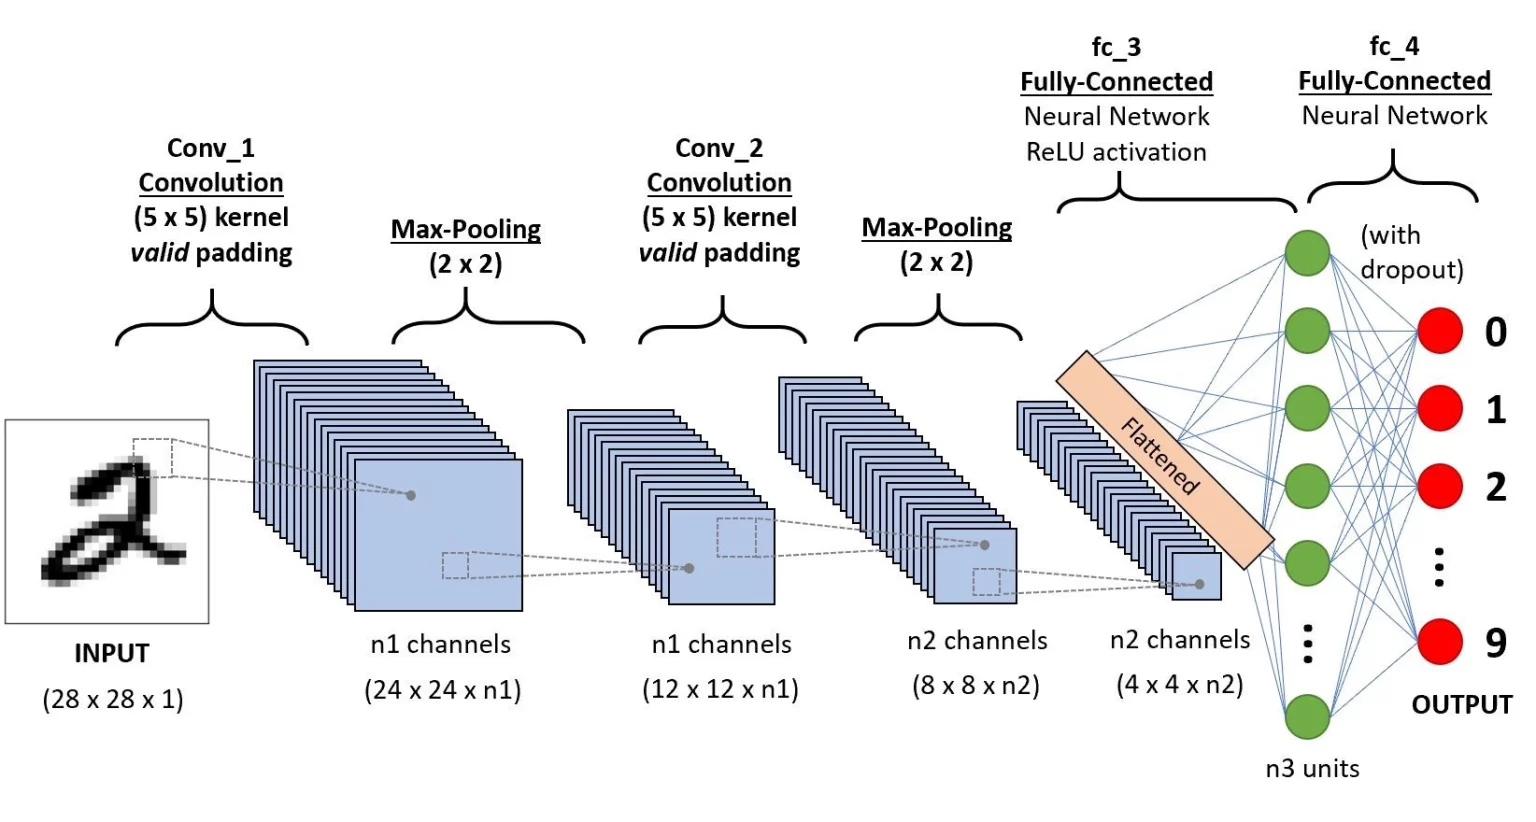

In [3]:
#load the training data
(train_images,train_labels),(test_images,test_labels)= tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_images[45]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
        185, 255, 253, 253, 230, 132, 132,  31,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  71, 242,
        252, 252, 228, 231, 252, 252, 252, 167,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  28, 166, 252, 252,
        235,  92,   0,  14, 142, 252, 252, 150,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 204, 252, 234, 152,
         44,   0,   0,  48, 225, 252, 180,  16,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  12, 164, 252, 232,  61,   0,
          0,   0,   6, 179, 252, 252,  60,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 252, 252,  76,   0,   0,
          0,  44, 199, 252, 252, 252,  60,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  89, 252, 228,  32,   0,   0,
         99, 231, 244, 220, 252, 203,  12,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 169, 252, 207,  97,  97, 206,
        234, 243,  32, 157, 252, 145,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  60, 252, 252, 252, 252, 252,
        200,  22,  11, 198, 231,  41,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  26, 131, 224, 252, 252, 142,
         11,   0,  82, 252, 204,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  13, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  82, 252, 220,  36,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 208, 252,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         24, 253, 247,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        121, 253, 199,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32,
        216, 244,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207,
        252, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [7]:
train_labels[45]

np.uint8(9)

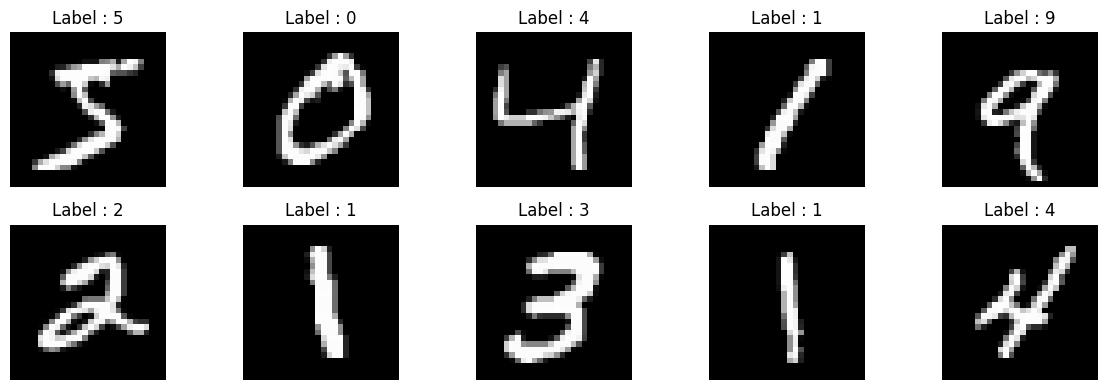

In [8]:
plt.figure(figsize = (12,4))
for i in range(10):
  plt.subplot(2,5,i+1)
  img = train_images[i].reshape(28,28)
  plt.imshow(img, cmap ='gray')
  plt.title(f'Label : {train_labels[i]}')
  plt.axis('off')
plt.tight_layout()
#plt.tight_layout() detects the overlaps and automatically adjusts the padding and margins so everything fits perfectly within the figure area.

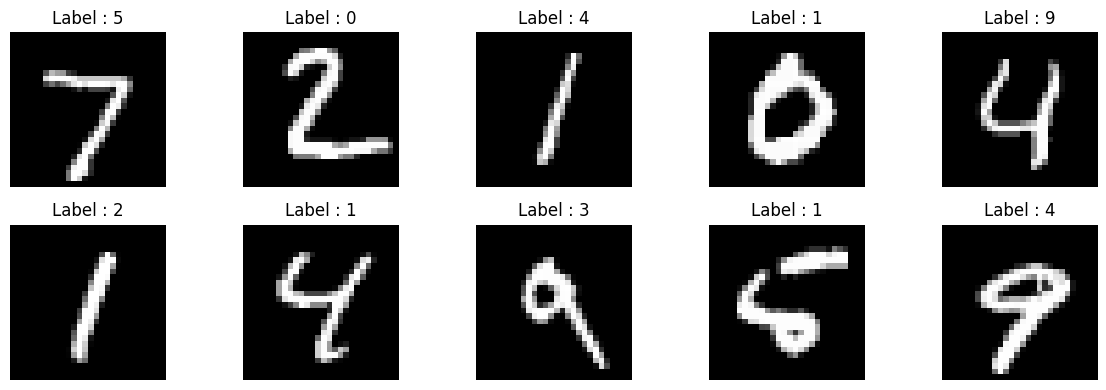

In [9]:
plt.figure(figsize = (12,4))
for i in range(10):
  plt.subplot(2,5,i+1)
  img = test_images[i].reshape(28,28)
  plt.imshow(img, cmap ='gray')
  plt.title(f'Label : {train_labels[i]}')
  plt.axis('off')
plt.tight_layout()

In [10]:
#nomalize the pixel values
# Scale pixel values to [0, 1] range for improved gradient stability and faster convergencetrain_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

train_images[45]

#reshape the image to include channel information
train_images = train_images.reshape((-1,28,28,1))
test_images =  test_images.reshape((-1,28,28,1))
""" I don't care how many images there are (Batch Size (-1)),
 just make sure each one is of 2D grid(28x28) with 1 color channel."""

train_images.shape

#one hot encode the label
train_labels_categorical = tf.keras.utils.to_categorical(train_labels)
test_labels_categorical = tf.keras.utils.to_categorical(test_labels)


In [11]:
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels_categorical.shape}")

Training images shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)


In [12]:
unique, counts = np.unique(train_labels, return_counts = True)
for digit, count in zip(unique,counts):
  print(f'Digit {digit} : {count} Samples')


Digit 0 : 5923 Samples
Digit 1 : 6742 Samples
Digit 2 : 5958 Samples
Digit 3 : 6131 Samples
Digit 4 : 5842 Samples
Digit 5 : 5421 Samples
Digit 6 : 5918 Samples
Digit 7 : 6265 Samples
Digit 8 : 5851 Samples
Digit 9 : 5949 Samples


In [13]:
unique, counts = np.unique(train_labels, return_counts=True)
for digit, count in zip(unique, counts):
  print(f"Digit {digit}: {count} samples")

Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


Our Data Is Balanced

In [14]:
# Data Augmentation (Creating Synthetic Variations)

data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.15),
    layers.RandomTranslation(0.1,0.1),
    layers.RandomZoom(0.15),
    layers.RandomContrast(0.1)
    ], name = 'data_augmentation')

In TensorFlow/Keras, the 'name' argument is like giving your layer a **unique ID**.

When you eventually run **model.summary()**, Keras lists every layer. Without names, they appear as sequential_1, sequential_2, etc. By naming it 'data_augmentation', your summary becomes instantly readable. You’ll know exactly which part of the architecture handles the image transformations.

# **# Constructing the CNN model architecture**

In [15]:
def create_model():
  #first Convulation Block
  model = models.Sequential([
    layers.Input(shape= (28,28,1)),
    data_augmentation,
    layers.Conv2D(32,(3,3), padding= 'same', activation= 'relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32,(3,3), padding= 'same', activation= 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    #second Convolution Block
    layers.Conv2D(64,(3,3), padding= 'same', activation= 'relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64,(3,3), padding= 'same', activation= 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    #ANN Dense layer
    layers.Flatten(),
    layers.Dense(256,activation= 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.50),

    layers.Dense(128, activation= 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.50),

    layers.Dense(10, activation= 'softmax')
  ], name= 'MNIST_CNN')
  return model




In [16]:
model = create_model()

In [17]:
model.summary()

Model: "MNIST_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 904,554 (3.45 MB)

 Trainable params: 903,402 (3.45 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [18]:
# learning rate schedule - lr decay
# Gradually reduce the learning rate to fine-tune weights and avoid overshooting the minimum
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate= 0.001,
    decay_steps= 1000,
    decay_rate= 0.9
)

In [19]:
optimizer= tf.keras.optimizers.Adam(learning_rate= lr_schedule)

In [20]:
model.compile(
    optimizer = optimizer,
    loss= 'categorical_crossentropy',
    metrics= ['accuracy']
)

In [21]:
# callback mechanism

# early_stoping
early_stopping= callbacks.EarlyStopping(
    monitor= 'val_loss',
    patience= 5,
    verbose= 0,  # <--- to see the "Early Stopping" message
    restore_best_weights= True,
    mode= 'auto'
)
# model checkpoint
model_checkpoint= callbacks.ModelCheckpoint(
      'best_mnist_model.keras',
      monitor= 'val_accuracy',
      mode='max',
      save_best_only= True,
      verbose = 1  # <---  to see "Saving model
)

In [22]:
from IPython.core import history
# Create the list of callbacks
my_callbacks = [early_stopping, model_checkpoint]

# Start training with your new "safety team"
history= model.fit(
    train_images,
    train_labels_categorical,
    epochs = 50,
    batch_size= 128,
    validation_split=0.1,  # Taken 10% from the end of your training data to test on each epochs
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 602ms/step - accuracy: 0.5235 - loss: 1.5552
Epoch 1: val_accuracy improved from -inf to 0.91967, saving model to best_mnist_model.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 272s 629ms/step - accuracy: 0.5240 - loss: 1.5537 - val_accuracy: 0.9197 - val_loss: 0.2745
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 623ms/step - accuracy: 0.8950 - loss: 0.3412
Epoch 2: val_accuracy improved from 0.91967 to 0.95483, saving model to best_mnist_model.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 268s 635ms/step - accuracy: 0.8950 - loss: 0.3411 - val_accuracy: 0.9548 - val_loss: 0.1472
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.9329 - loss: 0.2260
Epoch 3: val_accuracy improved from 0.95483 to 0.96783, saving model to best_mnist_model.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 314s 617ms/step - accuracy: 0.9329 - loss: 0.2259 - val_accuracy: 0.9678 - val_loss: 0.1016
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.9459 - loss: 0.1793
Epo

In [23]:
#load my saved model
model = tf.keras.models.load_model("/content/best_mnist_model.keras")

In [24]:
#how did it perform?
test_loss, test_acc = model.evaluate(test_images, test_labels_categorical)
print(f"test_loss : {test_loss:.2f}")
print(f"test_acc : {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.1603 - loss: 4.3801
test_loss : 4.43
test_acc : 0.15


In [25]:
#get prediction
predictions = model.predict(test_images)
predicted_class = np.argmax(predictions, axis=1)
true_classes = test_labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step


In [26]:
print(classification_report(true_classes, predicted_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.56      0.52      0.54      1135
           2       0.00      0.00      0.00      1032
           3       0.11      0.91      0.20      1010
           4       0.00      0.00      0.00       982
           5       0.06      0.00      0.00       892
           6       0.01      0.00      0.01       958
           7       0.00      0.00      0.00      1028
           8       0.10      0.04      0.05       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.15     10000
   macro avg       0.08      0.15      0.08     10000
weighted avg       0.09      0.15      0.09     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
